## Phase Gates
---

In [1]:
from qiskit import *
from math import pi
from quantum_utils import circle_notation

### Prep

In [2]:
def set_bits(a, b):
    qr = QuantumRegister(2)
    qc = QuantumCircuit(qr)
    if a == 1:
        qc.x(qr[0])
    if b == 1:
        qc.x(qr[1])
        
    return qc

def get_circle_notation(qc):
    backends = Aer.get_backend("statevector_simulator")
    job = execute(qc, backends)
    result = job.result()
    sv = result.get_statevector()
    circle_notation(sv, rows=1)
    return sv


#### Phase Or

In [3]:
def phase_or(a, b):
    qc = set_bits(a, b)
    qr = qc.qregs[0]
    qc.barrier()
    qc.h(qr)
    qc.barrier()
    qc.z(qr[0])
    qc.cu1(pi, qr[0], qr[1])
    qc.z(qr[1])
    return qc

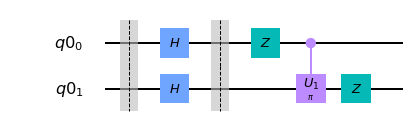

In [4]:
qc = phase_or(0,0)
qc.draw(output='mpl')

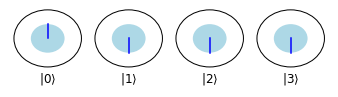

array([ 0.5+0.000000e+00j, -0.5+0.000000e+00j, -0.5+0.000000e+00j,
       -0.5+6.123234e-17j])

In [5]:
get_circle_notation(qc)

### Phase Nor

In [6]:
def phase_nor(a, b):
    qc = set_bits(a, b)
    qr = qc.qregs[0]
    qc.barrier()
    qc.h(qr)
    qc.barrier()
    qc.x(qr)
    qc.cu1(pi, qr[0], qr[1])
    qc.x(qr)
    return qc

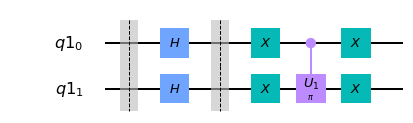

In [7]:
qc = phase_nor(0,0)
qc.draw(output='mpl')

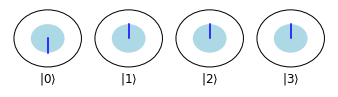

array([-0.5+6.123234e-17j,  0.5+0.000000e+00j,  0.5+0.000000e+00j,
        0.5+0.000000e+00j])

In [8]:
get_circle_notation(qc)

### Phase Xor

In [9]:
def phase_xor(a, b):
    qc = set_bits(a, b)
    qr = qc.qregs[0]
    qc.barrier()
    qc.h(qr)
    qc.barrier()
    
    qc.u1(pi, qr)
    return qc

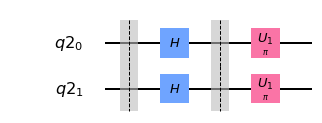

In [10]:
qc = phase_xor(0,0)
qc.draw(output='mpl')

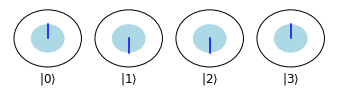

array([ 0.5+0.0000000e+00j, -0.5+6.1232340e-17j, -0.5+6.1232340e-17j,
        0.5-1.2246468e-16j])

In [11]:
get_circle_notation(qc)

### Phase And

In [12]:
def phase_and(a, b):
    qc = set_bits(a, b)
    qr = qc.qregs[0]
    qc.barrier()
    qc.h(qr)
    qc.barrier()
    
    qc.cz(qr[0], qr[1])
    return qc

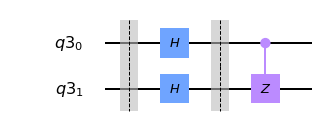

In [13]:
qc = phase_and(0,0)
qc.draw(output='mpl')

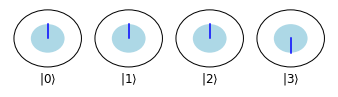

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [14]:
get_circle_notation(qc)

### Phase Nand

In [15]:
def phase_nand(a, b):
    qc = set_bits(a, b)
    qr = qc.qregs[0]
    qc.barrier()
    qc.h(qr)
    qc.barrier()
    
    qc.x(qr)
    qc.u1(pi, qr[0])
    qc.cu1(pi, qr[0], qr[1])
    qc.u1(pi, qr[1])
    qc.x(qr)
    return qc

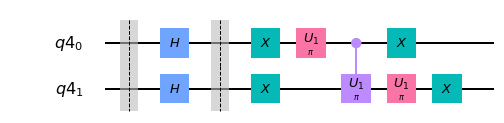

In [16]:
qc = phase_nand(0,0)
qc.draw(output='mpl')

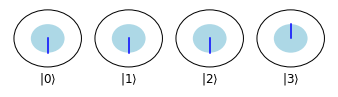

array([-0.5+1.8369702e-16j, -0.5+6.1232340e-17j, -0.5+6.1232340e-17j,
        0.5+0.0000000e+00j])

In [17]:
get_circle_notation(qc)